# 035

Named after this: https://www.youtube.com/watch?v=hgZFuq2S15A
        
This code is designed to mimic the way the retina works in identifying parts of images, etc. 

The code is designed entirely to respond to MNIST sized data in order to get the respective neurons working,
it is not designed to learn from this data (at least at this point). MNIST data seemed an appropriate level
of complexity and size to get a small number of neurons working together.

### Setup the environment

In [1]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Create a sample image to work with

TODO: Flesh this out into a data pipeline later

In [2]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

def get_next_image(index=0):
    return images[index]
    

* Get an image from the training set

In [3]:
image = get_next_image(index=0)
print(mndata.display(image))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


* Convert to a numpy array so we can process it easier / better

In [4]:
image=np.asarray(image).reshape((28,28))
print(image)
print(image.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Convolve the image...

* Step across the image, creating a series of mini-matrices that can be used to feed into the retinal neurons

In [5]:
stride = (4,2)   # This will be 5 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
#x_max = int((len_x - stride_size)/stride[0])+1
#y_max = int((len_y - stride_size)/stride[0])+1
x_max = int(len_x/stride[0])
y_max = int(len_y/stride[0])
print ('Convolution Dimensions: x={} / y={}, starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

NameError: name 'x_count' is not defined

Rendering kernel 0/0 at plot 1/1/1
Rendering kernel 4/0 at plot 2/1/2
Rendering kernel 8/0 at plot 3/1/3
Rendering kernel 12/0 at plot 4/1/4
Rendering kernel 16/0 at plot 5/1/5
Rendering kernel 20/0 at plot 6/1/6
Rendering kernel 24/0 at plot 7/1/7
Rendering kernel 0/4 at plot 1/2/8
Rendering kernel 4/4 at plot 2/2/9
Rendering kernel 8/4 at plot 3/2/10
Rendering kernel 12/4 at plot 4/2/11
Rendering kernel 16/4 at plot 5/2/12
Rendering kernel 20/4 at plot 6/2/13
Rendering kernel 24/4 at plot 7/2/14
Rendering kernel 0/8 at plot 1/3/15
Rendering kernel 4/8 at plot 2/3/16
Rendering kernel 8/8 at plot 3/3/17
Rendering kernel 12/8 at plot 4/3/18
Rendering kernel 16/8 at plot 5/3/19
Rendering kernel 20/8 at plot 6/3/20
Rendering kernel 24/8 at plot 7/3/21
Rendering kernel 0/12 at plot 1/4/22
Rendering kernel 4/12 at plot 2/4/23
Rendering kernel 8/12 at plot 3/4/24
Rendering kernel 12/12 at plot 4/4/25
Rendering kernel 16/12 at plot 5/4/26
Rendering kernel 20/12 at plot 6/4/27
Rendering kernel

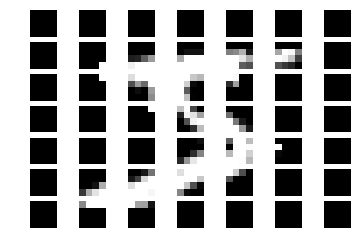

In [6]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

#for y in range (0, len_y - stride_size, stride[0]):
for y in range (0, len_y, stride[0]):
    x_count = 1
    #for x in range(0, len_x - stride_size, stride[0]):
    for x in range(0, len_x, stride[0]):
        print ('Rendering kernel {}/{} at plot {}/{}/{}'.format(x, y, x_count, y_count, (y_count-1)*x_max+x_count))

        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

### Create a basic neuron

Use LIF neuron for now, this can be made more complex over time.

Also this code can be moved out to a seperate function too!!

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [14]:
# Simulation config (may not all be needed!!)
T        = 50          # total time to sumulate (msec)
dt       = 0.125       # simulation time step
time     = np.arange(0, T+dt, dt) # Time array
t_rest   = 0           # initial refractory time

In [15]:
#LIF Properties 
Vm       = np.zeros(len(time)) # potential (V) trace over time
Rm       = 1                # Resistance (kOhm)
Cm       = 10               # Capacitance (uF)
tau_m    = Rm * Cm          # Time constant
tau_ref  = 4                # refractory period (ms)
Vth      = 1                # spike threshold
V_spike  = 0.5              # spike delta (V)

* Replace the input current with the pixel value (brightness)

In [16]:
I        = 1.5              # input current (A)  

* Function to create spikes for this neuron

Need to pass in the current / pixel brightness here!!

In [18]:
def neuron(value):
    for i,t in enumerate(time):
        if t > t_rest:
            Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
            if Vm[i] >= Vth:
                Vm[i] += V_spike
                t_rest = t + tau_ref

### Create a retinal unit

Each retinal unit contains

* On-centre cells
* Off-centre / surround cells
* Horizontal cells
* Ganglion cells

Now let's create a function for each type of cell...


* On-center cell

In [ ]:
def on_center_cell(value):
    